# Import Necessary Packages and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import random
import scipy.stats as stats

from sklearn.model_selection import KFold
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression

In [2]:
pd.set_option('display.max_columns',None)

# Data Cleaning/EDA

### Read in Data

In [3]:
data = pd.read_excel('dataset/Concrete_Data.xls')
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### Shorten Column Names

In [4]:
data.columns = ['Cement','Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age','Strength']
data

,Cement,Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


### Quick EDA

In [5]:
len(data)

1030

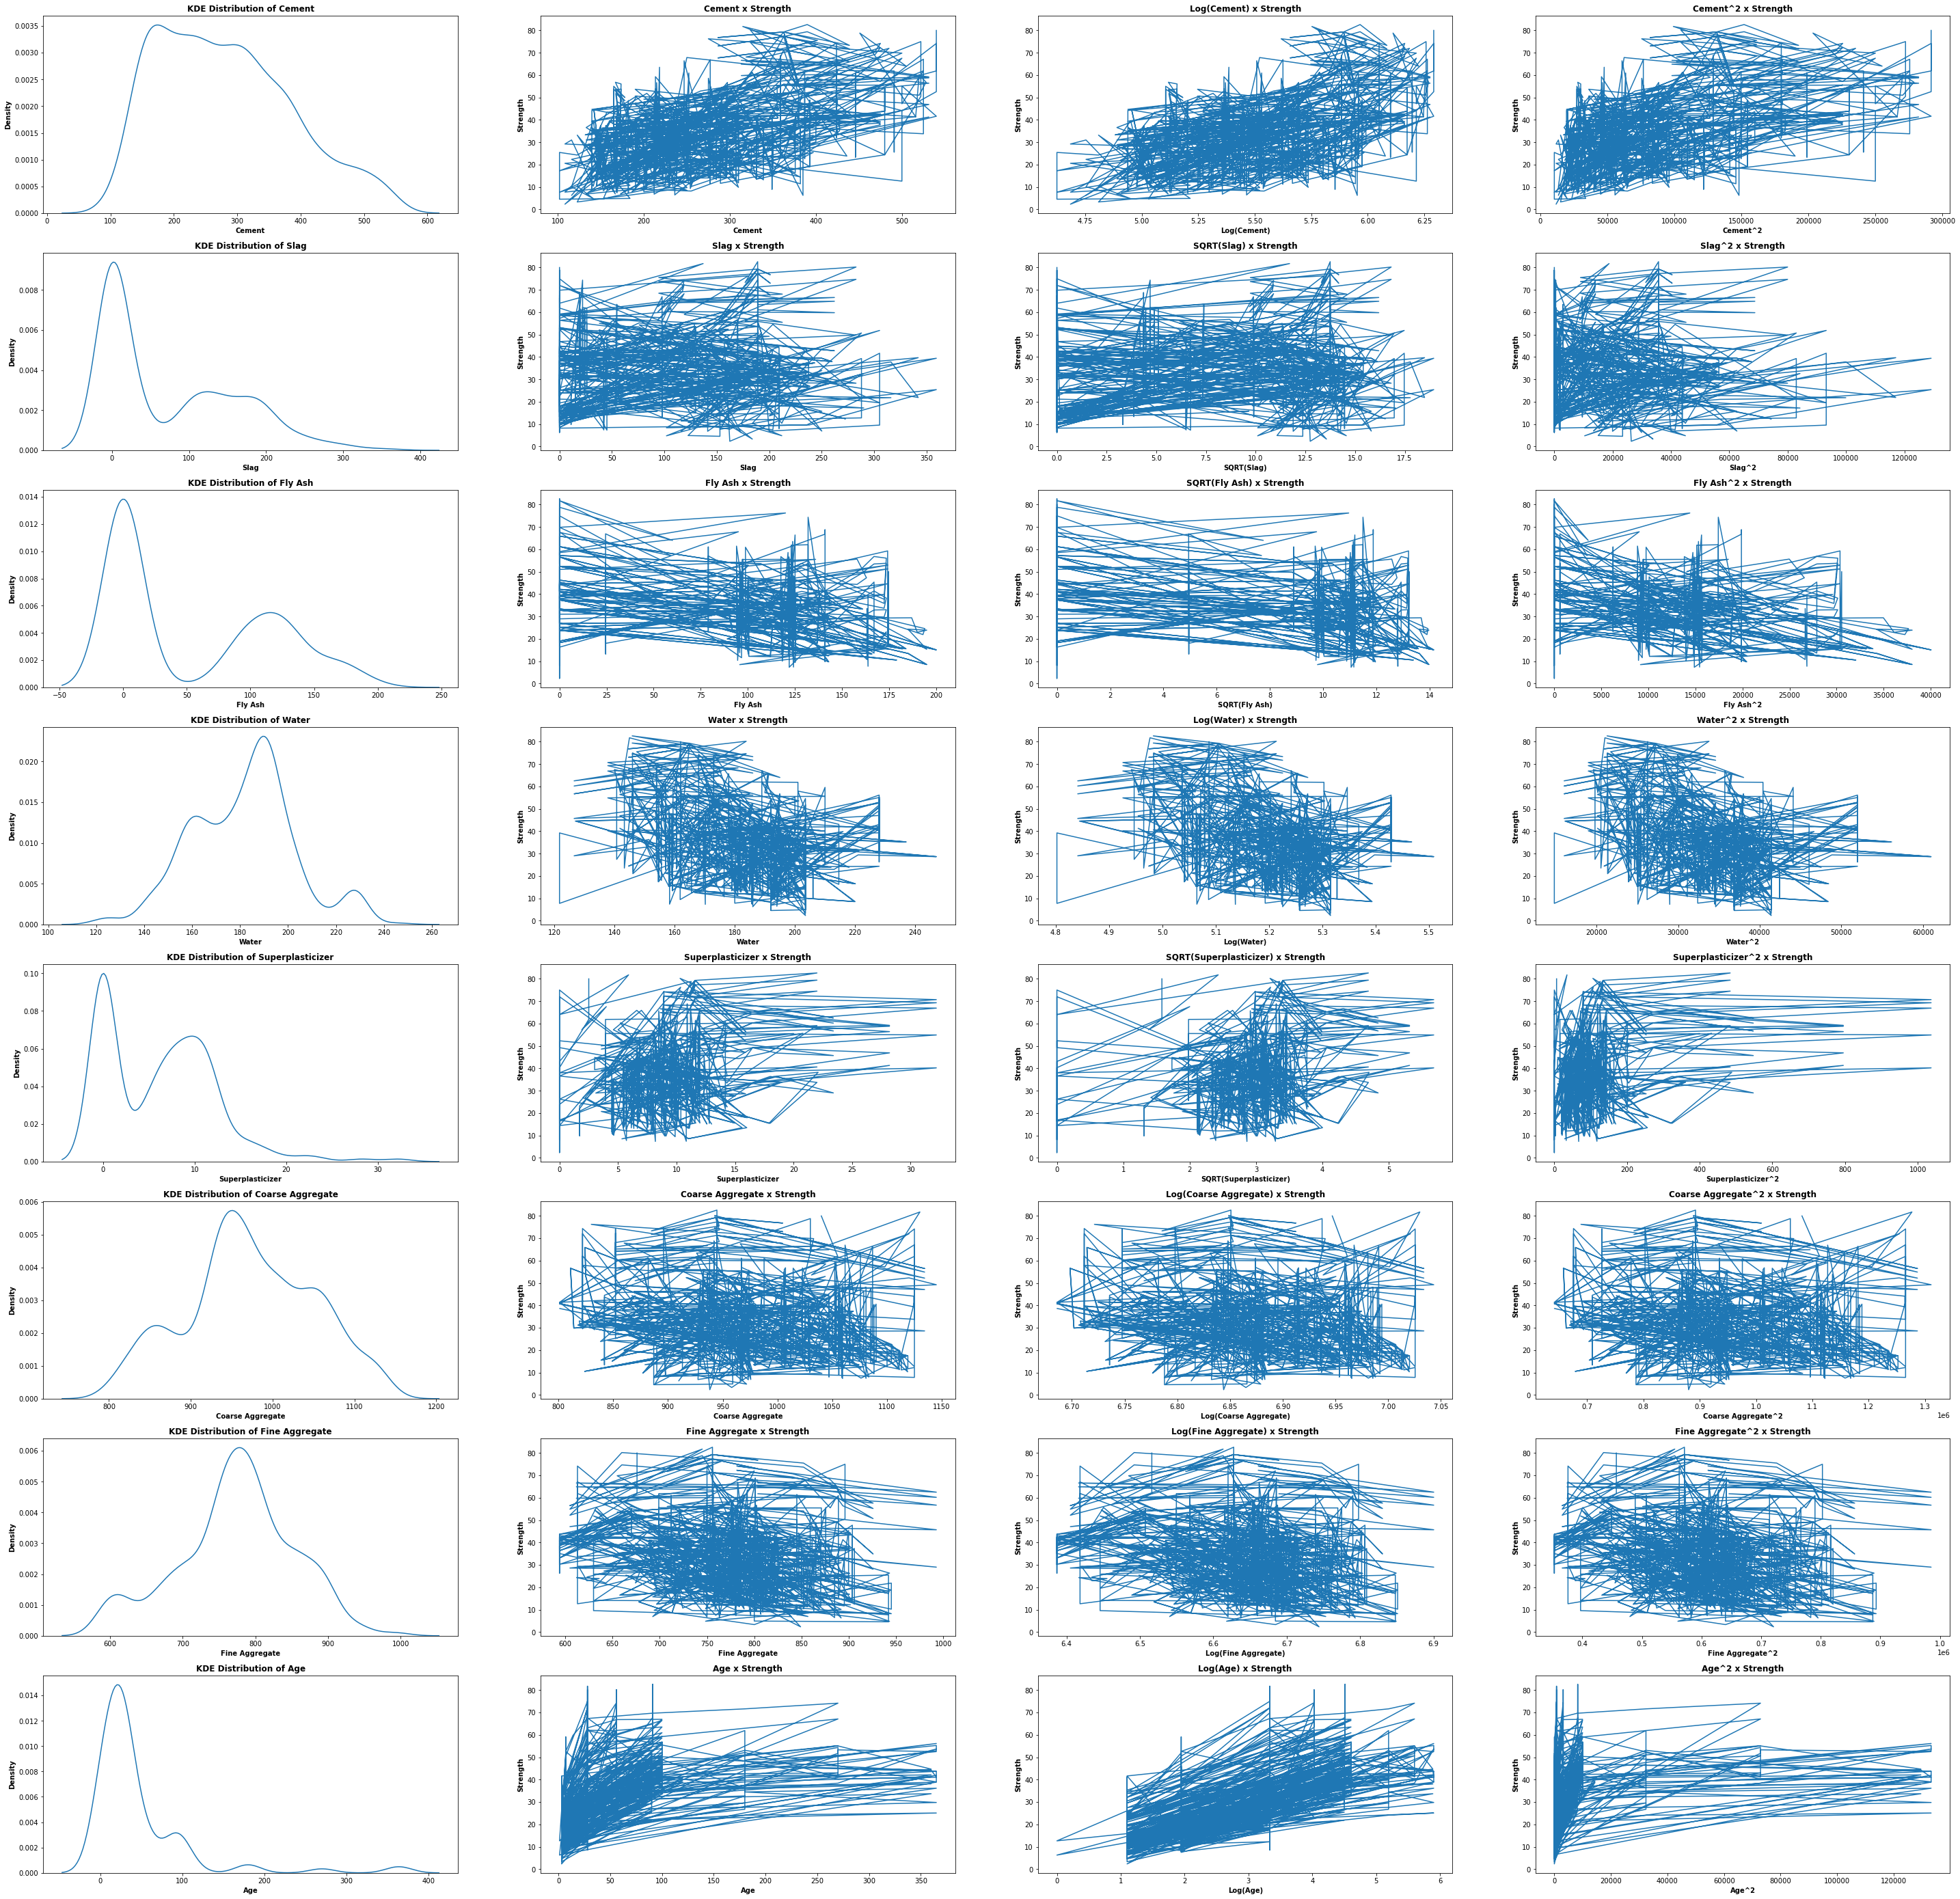

In [6]:
fig,axes = plt.subplots(nrows=data.shape[1]-1,ncols=4,figsize=(50,50)) # Create a grid of figures to plot data

#For each feature column, plot a kernel density to show univariate distribution and the following bivariate plots:
#Scatter 1: X = Feature, Y = Strength
#Scatter 2: X = Log(Feature) or SQRT(Feature) if Feature minimum = 0, Y = Strength
#Scatter 3: X = Feature**2, Y = Strength

label_data = data['Strength']
for num in range(data.shape[1]-1):
    feature_data = data[data.columns[num]]
    feature_name = data.columns[num]
    
    #KDE Plot
    sns.kdeplot(feature_data,ax=axes[num,0])
    axes[num][0].set_title('KDE Distribution of ' + feature_name,fontweight = 'bold')
    axes[num][0].set_ylabel('Density',fontweight = 'bold')
    axes[num][0].set_xlabel(feature_name,fontweight = 'bold')
    
    #Scatter 1
    axes[num][1].plot(feature_data,label_data)
    axes[num][1].set_title(feature_name + ' x Strength',fontweight='bold')
    axes[num][1].set_ylabel('Strength',fontweight = 'bold')
    axes[num][1].set_xlabel(feature_name,fontweight = 'bold')
    
    #Scatter 2
    if feature_data.min() == 0: #SQRT feature transformation
        axes[num][2].plot(np.sqrt(feature_data),label_data)
        axes[num][2].set_title('SQRT(' + feature_name + ') x Strength',fontweight='bold')
        axes[num][2].set_ylabel('Strength',fontweight = 'bold')
        axes[num][2].set_xlabel('SQRT(' + feature_name + ')',fontweight = 'bold')
    elif feature_data.min() > 0: #Log Feature Transformation
        axes[num][2].plot(np.log(feature_data),label_data)
        axes[num][2].set_title('Log(' + feature_name + ') x Strength',fontweight='bold')
        axes[num][2].set_ylabel('Strength',fontweight = 'bold')
        axes[num][2].set_xlabel('Log(' + feature_name + ')',fontweight = 'bold')
    
    #Scatter 3
    axes[num][3].plot(feature_data**2,label_data)
    axes[num][3].set_title(feature_name + '^2 x Strength',fontweight='bold')
    axes[num][3].set_ylabel('Strength',fontweight = 'bold')
    axes[num][3].set_xlabel(feature_name + '^2',fontweight = 'bold')

### Key Insights from EDA
- This is not a single dimensional linear relationship regardless of feature transformation
- Due to the general uninterpretable patterns of most singular features (and associated transformations) vs concrete strength, interactions and ratios among ingredient components/age likely have a more explainable linear or directional impact on strength
- Slag, Fly Ash, and Superplasticizer have minimum values of zero meaning log transforms are not appropriate. SQRT(X) could be explored as an alternative
- Age appears to have clustering around "younger samples" in the bottom left corner both from a univariate distribution perspective and when plotted against strength. Log(Age) actually does show some degree of a linear relationshipa

# Feature Engineering

### Methodology
Based off the EDA above and our general project intent, we will develop features that include log/sqrt feature transformations when appropriate. In addition, we will also include features representative of unique pairwise ratios of ingredients. Finally, we will also include an additional categorical treatment of age through binning as well as associated interaction effects of binned age with the previously mentioned features to account for potential non-linearity of age while providing the means to adjust other slope/intercept coefficients under specific age conditions. 

This feature engineering process will effectively explode our feature space into significantly higher dimensions. Therefore, our model development process will rely heavily on methods that attempt to provide regularization to models in order to preserve model parsimony. While our initial feature space is high, we anticipate that our selection of final models will be significantly lower dimensional models as a result of our model development frameworks identifying the subset of truly significant features. Overall, this process will allow us to identify how individual components, ratios of components, and age ultimately impact concrete compressive strength.

In [7]:
features = data.iloc[:,:-1].copy()
labels = data.iloc[:,-1].copy()

In [8]:
non_age_features = features.columns[:-1]
age_features = features.columns
print(non_age_features)
print(age_features)

Index(['Cement', 'Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate'],
      dtype='object')
Index(['Cement', 'Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age'],
      dtype='object')


### Log/SQRT and ^2 Transformations

In [9]:
for cols in age_features:
    if features[cols].min() == 0:
        features['SQRT(' + cols + ')'] = np.sqrt(features[cols])
    else:
        features['Log(' + cols + ')'] = np.log(features[cols])
    
    features[cols + '^2'] = features[cols]**2
    
features.head()

,Cement,Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Log(Cement),Cement^2,SQRT(Slag),Slag^2,SQRT(Fly Ash),Fly Ash^2,Log(Water),Water^2,SQRT(Superplasticizer),Superplasticizer^2,Log(Coarse Aggregate),Coarse Aggregate^2,Log(Fine Aggregate),Fine Aggregate^2,Log(Age),Age^2
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,6.291569,291600.00,0.000000,0.00,0.0,0.0,5.087596,26244.0,1.581139,6.25,6.946976,1081600.00,6.516193,456976.00,3.332205,784
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,6.291569,291600.00,0.000000,0.00,0.0,0.0,5.087596,26244.0,1.581139,6.25,6.961296,1113025.00,6.516193,456976.00,3.332205,784
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,5.806640,110556.25,11.937336,20306.25,0.0,0.0,5.429346,51984.0,0.000000,0.00,6.837333,868624.00,6.386879,352836.00,5.598422,72900
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,5.806640,110556.25,11.937336,20306.25,0.0,0.0,5.429346,51984.0,0.000000,0.00,6.837333,868624.00,6.386879,352836.00,5.899897,133225
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,5.291293,39441.96,11.506520,17529.76,0.0,0.0,5.257495,36864.0,0.000000,0.00,6.885919,957266.56,6.715989,681450.25,5.886104,129600


### Pairwise ratio features among **ingrediants (non-age features)**

In [10]:
pairwise_features = list(combinations(non_age_features,2))
print(pairwise_features)

[('Cement', 'Slag'), ('Cement', 'Fly Ash'), ('Cement', 'Water'), ('Cement', 'Superplasticizer'), ('Cement', 'Coarse Aggregate'), ('Cement', 'Fine Aggregate'), ('Slag', 'Fly Ash'), ('Slag', 'Water'), ('Slag', 'Superplasticizer'), ('Slag', 'Coarse Aggregate'), ('Slag', 'Fine Aggregate'), ('Fly Ash', 'Water'), ('Fly Ash', 'Superplasticizer'), ('Fly Ash', 'Coarse Aggregate'), ('Fly Ash', 'Fine Aggregate'), ('Water', 'Superplasticizer'), ('Water', 'Coarse Aggregate'), ('Water', 'Fine Aggregate'), ('Superplasticizer', 'Coarse Aggregate'), ('Superplasticizer', 'Fine Aggregate'), ('Coarse Aggregate', 'Fine Aggregate')]


In [11]:
for a,b in pairwise_features:
    a_min = features[a].min()
    b_min = features[b].min()
    if b_min != 0: #feature = ratio of a/b if this can be computed without losing data (non zero denominator)
        features[a + '/' + b] = features[a]/features[b]
    elif a_min != 0:#feature = ratio of b/a if this can be computed without losing data (non-zero denominator)
        features[b + '/' + a] = features[b]/features[a]

features.head()

,Cement,Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Log(Cement),Cement^2,SQRT(Slag),Slag^2,SQRT(Fly Ash),Fly Ash^2,Log(Water),Water^2,SQRT(Superplasticizer),Superplasticizer^2,Log(Coarse Aggregate),Coarse Aggregate^2,Log(Fine Aggregate),Fine Aggregate^2,Log(Age),Age^2,Slag/Cement,Fly Ash/Cement,Cement/Water,Superplasticizer/Cement,Cement/Coarse Aggregate,Cement/Fine Aggregate,Slag/Water,Slag/Coarse Aggregate,Slag/Fine Aggregate,Fly Ash/Water,Fly Ash/Coarse Aggregate,Fly Ash/Fine Aggregate,Superplasticizer/Water,Water/Coarse Aggregate,Water/Fine Aggregate,Superplasticizer/Coarse Aggregate,Superplasticizer/Fine Aggregate,Coarse Aggregate/Fine Aggregate
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,6.291569,291600.00,0.000000,0.00,0.0,0.0,5.087596,26244.0,1.581139,6.25,6.946976,1081600.00,6.516193,456976.00,3.332205,784,0.000000,0.0,3.333333,0.00463,0.519231,0.798817,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.015432,0.155769,0.239645,0.002404,0.003698,1.538462
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,6.291569,291600.00,0.000000,0.00,0.0,0.0,5.087596,26244.0,1.581139,6.25,6.961296,1113025.00,6.516193,456976.00,3.332205,784,0.000000,0.0,3.333333,0.00463,0.511848,0.798817,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.015432,0.153555,0.239645,0.002370,0.003698,1.560651
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,5.806640,110556.25,11.937336,20306.25,0.0,0.0,5.429346,51984.0,0.000000,0.00,6.837333,868624.00,6.386879,352836.00,5.598422,72900,0.428571,0.0,1.458333,0.00000,0.356760,0.559764,0.625000,0.152897,0.239899,0.0,0.0,0.0,0.000000,0.244635,0.383838,0.000000,0.000000,1.569024
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,5.806640,110556.25,11.937336,20306.25,0.0,0.0,5.429346,51984.0,0.000000,0.00,6.837333,868624.00,6.386879,352836.00,5.899897,133225,0.428571,0.0,1.458333,0.00000,0.356760,0.559764,0.625000,0.152897,0.239899,0.0,0.0,0.0,0.000000,0.244635,0.383838,0.000000,0.000000,1.569024
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,5.291293,39441.96,11.506520,17529.76,0.0,0.0,5.257495,36864.0,0.000000,0.00,6.885919,957266.56,6.715989,681450.25,5.886104,129600,0.666667,0.0,1.034375,0.00000,0.202984,0.240581,0.689583,0.135323,0.160388,0.0,0.0,0.0,0.000000,0.196239,0.232586,0.000000,0.000000,1.185221


### Binned Treatment of Age along with interaction effect with individual ingrediants (transformed and non-transformed) and ratios

In [12]:
#capture non-age columns 
new_non_age_features = []
for cols in features.columns:
    if 'Age' not in cols:
        new_non_age_features.append(cols)
print(new_non_age_features)

['Cement', 'Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Log(Cement)', 'Cement^2', 'SQRT(Slag)', 'Slag^2', 'SQRT(Fly Ash)', 'Fly Ash^2', 'Log(Water)', 'Water^2', 'SQRT(Superplasticizer)', 'Superplasticizer^2', 'Log(Coarse Aggregate)', 'Coarse Aggregate^2', 'Log(Fine Aggregate)', 'Fine Aggregate^2', 'Slag/Cement', 'Fly Ash/Cement', 'Cement/Water', 'Superplasticizer/Cement', 'Cement/Coarse Aggregate', 'Cement/Fine Aggregate', 'Slag/Water', 'Slag/Coarse Aggregate', 'Slag/Fine Aggregate', 'Fly Ash/Water', 'Fly Ash/Coarse Aggregate', 'Fly Ash/Fine Aggregate', 'Superplasticizer/Water', 'Water/Coarse Aggregate', 'Water/Fine Aggregate', 'Superplasticizer/Coarse Aggregate', 'Superplasticizer/Fine Aggregate', 'Coarse Aggregate/Fine Aggregate']


In [13]:
#Create bins for age. Bin 1: Age < 28 Days, Bin 2: Age = 28 Days, Bin 3: Age > 28 days
print(features['Age'].value_counts())
binned_age = features['Age'].apply(lambda x:0 if x< 28 else 1 if x == 28 else 2 )
features['Age = 28 Days'] = binned_age.apply(lambda x:0 if x in [0,2] else 1)
features['Age > 28 Days'] = binned_age.apply(lambda x:0 if x in [0,1] else 1)
features.head()

28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: Age, dtype: int64


,Cement,Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Log(Cement),Cement^2,SQRT(Slag),Slag^2,SQRT(Fly Ash),Fly Ash^2,Log(Water),Water^2,SQRT(Superplasticizer),Superplasticizer^2,Log(Coarse Aggregate),Coarse Aggregate^2,Log(Fine Aggregate),Fine Aggregate^2,Log(Age),Age^2,Slag/Cement,Fly Ash/Cement,Cement/Water,Superplasticizer/Cement,Cement/Coarse Aggregate,Cement/Fine Aggregate,Slag/Water,Slag/Coarse Aggregate,Slag/Fine Aggregate,Fly Ash/Water,Fly Ash/Coarse Aggregate,Fly Ash/Fine Aggregate,Superplasticizer/Water,Water/Coarse Aggregate,Water/Fine Aggregate,Superplasticizer/Coarse Aggregate,Superplasticizer/Fine Aggregate,Coarse Aggregate/Fine Aggregate,Age = 28 Days,Age > 28 Days
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,6.291569,291600.00,0.000000,0.00,0.0,0.0,5.087596,26244.0,1.581139,6.25,6.946976,1081600.00,6.516193,456976.00,3.332205,784,0.000000,0.0,3.333333,0.00463,0.519231,0.798817,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.015432,0.155769,0.239645,0.002404,0.003698,1.538462,1,0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,6.291569,291600.00,0.000000,0.00,0.0,0.0,5.087596,26244.0,1.581139,6.25,6.961296,1113025.00,6.516193,456976.00,3.332205,784,0.000000,0.0,3.333333,0.00463,0.511848,0.798817,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.015432,0.153555,0.239645,0.002370,0.003698,1.560651,1,0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,5.806640,110556.25,11.937336,20306.25,0.0,0.0,5.429346,51984.0,0.000000,0.00,6.837333,868624.00,6.386879,352836.00,5.598422,72900,0.428571,0.0,1.458333,0.00000,0.356760,0.559764,0.625000,0.152897,0.239899,0.0,0.0,0.0,0.000000,0.244635,0.383838,0.000000,0.000000,1.569024,0,1
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,5.806640,110556.25,11.937336,20306.25,0.0,0.0,5.429346,51984.0,0.000000,0.00,6.837333,868624.00,6.386879,352836.00,5.899897,133225,0.428571,0.0,1.458333,0.00000,0.356760,0.559764,0.625000,0.152897,0.239899,0.0,0.0,0.0,0.000000,0.244635,0.383838,0.000000,0.000000,1.569024,0,1
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,5.291293,39441.96,11.506520,17529.76,0.0,0.0,5.257495,36864.0,0.000000,0.00,6.885919,957266.56,6.715989,681450.25,5.886104,129600,0.666667,0.0,1.034375,0.00000,0.202984,0.240581,0.689583,0.135323,0.160388,0.0,0.0,0.0,0.000000,0.196239,0.232586,0.000000,0.000000,1.185221,0,1


In [14]:
#Capture Interaction Effects
binned_age_cols = ['Age = 28 Days','Age > 28 Days']
for cols in new_non_age_features:
    features[binned_age_cols[0] + ' * ' + cols] = features[binned_age_cols[0]]*features[cols]
    features[binned_age_cols[1] + ' * ' + cols] = features[binned_age_cols[1]]*features[cols]
features.head()

,Cement,Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Log(Cement),Cement^2,SQRT(Slag),Slag^2,SQRT(Fly Ash),Fly Ash^2,Log(Water),Water^2,SQRT(Superplasticizer),Superplasticizer^2,Log(Coarse Aggregate),Coarse Aggregate^2,Log(Fine Aggregate),Fine Aggregate^2,Log(Age),Age^2,Slag/Cement,Fly Ash/Cement,Cement/Water,Superplasticizer/Cement,Cement/Coarse Aggregate,Cement/Fine Aggregate,Slag/Water,Slag/Coarse Aggregate,Slag/Fine Aggregate,Fly Ash/Water,Fly Ash/Coarse Aggregate,Fly Ash/Fine Aggregate,Superplasticizer/Water,Water/Coarse Aggregate,Water/Fine Aggregate,Superplasticizer/Coarse Aggregate,Superplasticizer/Fine Aggregate,Coarse Aggregate/Fine Aggregate,Age = 28 Days,Age > 28 Days,Age = 28 Days * Cement,Age > 28 Days * Cement,Age = 28 Days * Slag,Age > 28 Days * Slag,Age = 28 Days * Fly Ash,Age > 28 Days * Fly Ash,Age = 28 Days * Water,Age > 28 Days * Water,Age = 28 Days * Superplasticizer,Age > 28 Days * Superplasticizer,Age = 28 Days * Coarse Aggregate,Age > 28 Days * Coarse Aggregate,Age = 28 Days * Fine Aggregate,Age > 28 Days * Fine Aggregate,Age = 28 Days * Log(Cement),Age > 28 Days * Log(Cement),Age = 28 Days * Cement^2,Age > 28 Days * Cement^2,Age = 28 Days * SQRT(Slag),Age > 28 Days * SQRT(Slag),Age = 28 Days * Slag^2,Age > 28 Days * Slag^2,Age = 28 Days * SQRT(Fly Ash),Age > 28 Days * SQRT(Fly Ash),Age = 28 Days * Fly Ash^2,Age > 28 Days * Fly Ash^2,Age = 28 Days * Log(Water),Age > 28 Days * Log(Water),Age = 28 Days * Water^2,Age > 28 Days * Water^2,Age = 28 Days * SQRT(Superplasticizer),Age > 28 Days * SQRT(Superplasticizer),Age = 28 Days * Superplasticizer^2,Age > 28 Days * Superplasticizer^2,Age = 28 Days * Log(Coarse Aggregate),Age > 28 Days * Log(Coarse Aggregate),Age = 28 Days * Coarse Aggregate^2,Age > 28 Days * Coarse Aggregate^2,Age = 28 Days * Log(Fine Aggregate),Age > 28 Days * Log(Fine Aggregate),Age = 28 Days * Fine Aggregate^2,Age > 28 Days * Fine Aggregate^2,Age = 28 Days * Slag/Cement,Age > 28 Days * Slag/Cement,Age = 28 Days * Fly Ash/Cement,Age > 28 Days * Fly Ash/Cement,Age = 28 Days * Cement/Water,Age > 28 Days * Cement/Water,Age = 28 Days * Superplasticizer/Cement,Age > 28 Days * Superplasticizer/Cement,Age = 28 Days * Cement/Coarse Aggregate,Age > 28 Days * Cement/Coarse Aggregate,Age = 28 Days * Cement/Fine Aggregate,Age > 28 Days * Cement/Fine Aggregate,Age = 28 Days * Slag/Water,Age > 28 Days * Slag/Water,Age = 28 Days * Slag/Coarse Aggregate,Age > 28 Days * Slag/Coarse Aggregate,Age = 28 Days * Slag/Fine Aggregate,Age > 28 Days * Slag/Fine Aggregate,Age = 28 Days * Fly Ash/Water,Age > 28 Days * Fly Ash/Water,Age = 28 Days * Fly Ash/Coarse Aggregate,Age > 28 Days * Fly Ash/Coarse Aggregate,Age = 28 Days * Fly Ash/Fine Aggregate,Age > 28 Days * Fly Ash/Fine Aggregate,Age = 28 Days * Superplasticizer/Water,Age > 28 Days * Superplasticizer/Water,Age = 28 Days * Water/Coarse Aggregate,Age > 28 Days * Water/Coarse Aggregate,Age = 28 Days * Water/Fine Aggregate,Age > 28 Days * Water/Fine Aggregate,Age = 28 Days * Superplasticizer/Coarse Aggregate,Age > 28 Days * Superplasticizer/Coarse Aggregate,Age = 28 Days * Superplasticizer/Fine Aggregate,Age > 28 Days * Superplasticizer/Fine Aggregate,Age = 28 Days * Coarse Aggregate/Fine Aggregate,Age > 28 Days * Coarse Aggregate/Fine Aggregate
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,6.291569,291600.00,0.000000,0.00,0.0,0.0,5.087596,26244.0,1.581139,6.25,6.946976,1081600.00,6.516193,456976.00,3.332205,784,0.000000,0.0,3.333333,0.00463,0.519231,0.798817,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.015432,0.155769,0.239645,0.002404,0.003698,1.538462,1,0,540.0,0.0,0.0,0.0,0.0,0.0,162.0,0.0,2.5,0.0,1040.0,0.0,676.0,0.0,6.291569,0.000000,291600.0,0.00,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,5.087596,0.000000,26244.0,0.0,1.581139,0.0,6.25,0.0,6.946976,0.000000,1081600.0,0.00,6.516193,0.000000,456976.0,0.00,0.0,0.000000,0.0,0.0,3.333333,0.000000,0.00463,0.0,0.519231,0.000000,0.798817,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.

### Final Labeled Dataset

In [15]:
labeled_data = features.copy()
labeled_data['Strength'] = labels

### Feature Data Shape (rows,total number of features)

In [16]:
features.shape

(1030, 122)

### 80-20 Train/Test Split into Training/Exploration Set and Test Set

In [17]:
np.random.seed(50) #Set Seed for Reproducable Train/Test Split

training_sample = []
test_sample = []

for num in range(len(labeled_data)): #Decide whether each sample is in training or test set
    assignment_val = np.random.random() #Generate random number between 0-1
    if assignment_val < 0.8: #If random number is less than 0.8, training set, else test set. Seed ensures this value generation process is reproducable
        training_sample.append(num)
    else:
        test_sample.append(num)

print(len(training_sample))
print(len(test_sample))

825
205


In [18]:
training_data = labeled_data.iloc[training_sample].copy()
test_data = labeled_data.iloc[test_sample].copy()
training_data.index = range(len(training_data))
test_data.index = range(len(test_data))

In [19]:
training_data.to_csv('dataset/training_data.csv')
test_data.to_csv('dataset/test_data.csv')

# Model Development

### Methodology
We currently have 122 features, a majority of which are likely not significant towards predicting strength. Our goal for the model development process is to use a variety of techniques to identify models that achieve better model parsimony by identifying feature subsets that are truly significant without incorporating features that do not provide value in a linear model. We will utilize the following 4 methods for identifying optimal models:
1. Backwards Stepwise: Start with a full featured model and sequentially remove the most insignificant features from the model until only significant features remain below a specified alpha.
2. Forward-Backward Stepwise: Start with an optimal model, and sequenially add the most significant features to the model until an additional significant feature cannot be identified under a specified alpha. After an additional feature cannot be identified, we will execute a backwards stepwise process to remove any identified features that became insignificant due to feature additions.
3. Forward Stepwise w/ 5 Fold Cross Validation: This method will break our training set into 5 folds and generally train on 4 folds before being evaluated on the hold out folds. Used to identify how well a model generalizes to out of sample data, we will start with an empty model and use this framework to sequentially identify how well specific feature additions alongside a linear model generalize to out of sample data by identifying the feature addition that causes the maximum reduction in out of sample error (via root mean squared error). This process will continue until a feature addition cannot be made without viewing an increase in out of sample error. Following the identification of optimal features, the model will be trained with these features on the full training dataset and a backwards stepwise approach will be used as necessary to eliminate insignificant features.
4. Backwards Stepwise w/ 5 Fold Cross Validation: Similar to the forward stepwise counterpart, the major difference is this method starts with a full featured model and aims to sequentially identify feature dropouts that maximize reduction in out of sample error. After an optimal feature subset has been identified, a model will be trained with these features on the full training dataset and a backwards stepwise approach will be used as necessary to eliminate insignificant features.

### Large Sample Model Assumptions

In [20]:
len(training_data)

825

In [21]:
training_features = training_data.iloc[:,:-1].copy()
training_labels = training_data.iloc[:,[-1]].copy()

In [22]:
np.linalg.det(np.dot(training_features.T,training_features))

2.999013196187277e+175

- With over 800 concrete samples in our training set, our data meets the sample size requirement for a large sample model. In addition, the data provided by an individual concrete sample does not provide information on the data for another concrete sample, and there is no evidence that supports clustering of any kind that could have violated this assumption. There is also no reason to believe that these samples were generated using fundamentally different processes. Finally, with a non-zero determinant of XtX, a linear model can be identified via the closed form solution B = (XtX)^-1(XtX) meaning that the BLP exists and is unique without needing to use an alternate method such as gradient descent. Therefore, there is not sufficient evidence to conclude that large sample assumptions have been violated.

#### Typically, we would use sklearn's LinearRegression implementation for a problem such as this. However, while optimized for evaluating out of sample accuracy/r2/etc., sklearn does not have a built in coefficient testing framework. Therefore, we will build our own model class

### Custom Linear Regression Model Class

In [23]:
class lin_reg:
    
    def __init__(self):
        self = self
    
    def fit(self,X,Y):
        #Create copies of feature, label data to ensure there is no broadcasting
        X = X.copy()
        #Add intercept to capture coefficient value for intercept term (will show up last in computed B)
        X['Intercept'] = 1
        self.X = X.copy()
        self.Y = Y.copy()
        
        #Compute XtX, XtY
        xtx = np.dot(X.T,X)
        xty = np.dot(X.T,Y)
        
        #Compute Linear Coeffiecients
        self.B = np.dot(np.linalg.inv(xtx),xty)
        
    def coef(self):
        return self.B
        
    def predict(self,Xtest):
        Xtest = Xtest.copy()
        # Add in intercept to test data to pass into B
        Xtest['Intercept'] = 1
        #Make predictions on passed in feature data given fit model
        preds = np.dot(Xtest,self.B)
        return preds
    
    def fit_r2(self,r2_type = 'r2'):
        #Evaluate the in sample r2 of a fit model
        in_sample_preds = self.predict(self.X) #Training Predictions
        in_sample_r2 = r2_score(self.Y,in_sample_preds) #In sample r2
        
        if r2_type == 'r2':
            r2 = in_sample_r2
        elif r2_type == 'adj_r2': #adjusted r2 formula = 1 – [(1-R2)*(n-1)/(n-k-1)]
            r2 = 1 - (1-in_sample_r2)*((self.X.shape[0]-1)/(self.X.shape[0] - self.X.shape[1]))
        
        return r2
    
    def fit_vcov(self):
        #Calculate Squared Residuals
        in_sample_residuals = (self.predict(self.X) - self.Y)**2
        #Residuals matrix = R, Identify matrix but with squared residuals on main diagonal
        residuals_matrix = np.eye(len(self.X))
        for num in range(len(self.X)):
            residuals_matrix[num][num] = in_sample_residuals.iloc[num,0]
        
        #Variance Covariance Matrix = (XtX)^-1(XtR)X(XtX)^-1
        xtx = np.dot(self.X.T,self.X)
        xtx_inv = np.linalg.inv(xtx) #p,p
        xtr = np.dot(self.X.T,residuals_matrix) #p,n
        x_xtx_inv = np.dot(self.X,xtx_inv) #n,p
        vcov_step_1 = np.dot(xtx_inv,xtr)
        vcov = np.dot(vcov_step_1,x_xtx_inv)
            
        return vcov
    
    def fit_coef_test(self):
        #Capture Robust Standard Errors
        vcov = self.fit_vcov()
        robust_standard_errors = np.sqrt(vcov.diagonal())
        
        #Capture degrees of freedom
        deg_freedom = self.X.shape[0] - self.X.shape[1]
        
        #Results Table
        coef_test_results = pd.DataFrame()
        coef_test_results['Feature/Intercept'] = self.X.columns
        coef_test_results['OLS Regression Coefficient'] = self.B
        coef_test_results['Robust Standard Errors'] = robust_standard_errors
        coef_test_results['T Statistic'] = coef_test_results['OLS Regression Coefficient']/coef_test_results['Robust Standard Errors']
        coef_test_results['Pr > |T|'] = coef_test_results['T Statistic'].apply(lambda x:stats.t.sf(abs(x),df=deg_freedom)*2)
        coef_test_results['Significance Codes'] = coef_test_results['Pr > |T|'].apply(lambda x:'***' if x < 0.001 else '**' if x < 0.01 
                                                                                      else '*' if x < 0.05 else '.' if x < 0.1 else ' ')
        #Signif. codes: 0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
        
        return coef_test_results
        

### Method 1: Backward Stepwise

In [98]:
def backward_stepwise(X,Y,alpha_val,max_feats = None):
    
    if max_feats == None:
        max_feats = X.shape[1]
    
    X = X.copy()
    Y = Y.copy()
    #instantiate model, capture all column names
    model = lin_reg()
    col_names = list(X.columns)
    cont = True
    
    while cont == True:
        features = X[col_names].copy() #Define feature data
        model.fit(features,Y) #Fit linear regression model to features, labels (Compute Regression Coefficients)
        coef_test_results = model.fit_coef_test().iloc[:-1,:] #run coefficient test
        #Capture p value and index of regression coefficient with max p-value
        max_p_val = coef_test_results['Pr > |T|'].max()
        max_index = coef_test_results['Pr > |T|'].argmax()
        
        if len(col_names) == 1: #Do nothing if there is only one feature remaining
            cont = False
        elif max_p_val >= alpha_val: #If regression coefficient with max p-value is higher than defined alpha value, then eliminate feature from model
            col_names.pop(max_index)
            if len(col_names) == 1:
                cont = False
        elif max_p_val < alpha_val and len(col_names)>max_feats:
            col_names.pop(max_index)
            if len(col_names) == 1:
                cont = False
        elif max_p_val < alpha_val and len(col_names) <= max_feats:
            cont = False
        
        #Continue the feature elimination process until only significant features w/ p-values less than the defined alpha value are remaining
        
    #Return model fitted on significant features and labels, final coefficient tests w/ significance, in_sample adjusted r2, and list of significant columns
    model.fit(X[col_names],Y)
    final_results = model.fit_coef_test()
    in_sample_adjusted_r2 = model.fit_r2(r2_type = 'adj_r2')
    
    return model,final_results,in_sample_adjusted_r2,col_names
    


### Method 1 Test

In [99]:
model1,model1_results,model1_adjusted_r2,model1_colnames = backward_stepwise(training_features,training_labels,0.001,8)

In [100]:
model1_results

,Feature/Intercept,OLS Regression Coefficient,Robust Standard Errors,T Statistic,Pr > |T|,Significance Codes
0,Water,-1.611821,0.231831,-6.952576,7.348918e-12,***
1,Coarse Aggregate,0.910380,0.168539,5.401591,8.670733e-08,***
2,Coarse Aggregate^2,-0.000327,0.000068,-4.808906,1.807028e-06,***
3,Log(Age),7.750596,0.248538,31.184749,3.412281e-141,***
4,Cement/Water,16.243562,0.552563,29.396768,4.123936e-130,***
5,Slag/Coarse Aggregate,58.834371,3.521198,16.708625,3.990466e-54,***
6,Water/Coarse Aggregate,1430.582873,216.979626,6.593167,7.727034e-11,***
7,Age > 28 Days * Superplasticizer/Cement,144.218992,26.167230,5.511435,4.775175e-08,***
8,Intercept,-570.598151,100.098914,-5.700343,1.670507e-08,***


In [101]:
model1_adjusted_r2

0.8016079854040407

In [102]:
print(model1_colnames)

['Water', 'Coarse Aggregate', 'Coarse Aggregate^2', 'Log(Age)', 'Cement/Water', 'Slag/Coarse Aggregate', 'Water/Coarse Aggregate', 'Age > 28 Days * Superplasticizer/Cement']


In [103]:
# METHOD 1 FINAL MODEL, EVALUATION ON TEST DATA
preds = model1.predict(test_data.iloc[:,:-1][model1_colnames]) #CAPTURE PREDICTIONS
print(r2_score(test_data.iloc[:,-1],preds)) #OUT OF SAMPLE R2
print(mean_squared_error(test_data.iloc[:,-1],preds,squared=False)) #OUT OF SAMPLE RMSE
print(mean_absolute_error(test_data.iloc[:,-1],preds)) #OUT OF SAMPLE MAE

0.8317001282344946
6.890822301948183
5.454664264255905


### Method 2: Forward-Backward Stepwise

In [104]:
def forward_backward_stepwise(X,Y,alpha_val,max_feats = None):
    if max_feats == None:
        max_feats = X.shape[1]
    
    X = X.copy()
    Y = Y.copy()
    #instantiate model, capture all column names
    model = lin_reg()
    col_names = list(X.columns)
    current_cols = [] #object storing current features in a model, to be tracked for each iteration
    cont = True
    
    while cont == True:
        best_feature = ''
        best_p_val = 1
        for cols in col_names:
            if cols not in current_cols:
                current_cols.append(cols)
                features = X[current_cols].copy() #Define feature data
                model.fit(features,Y) #Fit linear regression model to features, labels (Compute Regression Coefficients)
                coef_test_results = model.fit_coef_test().iloc[[-2],:] #run coefficient test
                #capture p-value of added feature
                p_val = coef_test_results['Pr > |T|'].iloc[0]
                #if p val of added feature is better than currently identified best feature addition, then update best
                if p_val < best_p_val:
                    best_p_val = p_val
                    best_feature = cols
                
                current_cols.pop()
        
        #Add best feature to model if p_value is below specified alpha values
        if len(current_cols) == min(max_feats,len(col_names)):
            cont = False
        elif best_p_val < alpha_val:
            current_cols.append(best_feature)
            if len(current_cols) == min(max_feats,len(col_names)):
                cont = False
        elif best_p_val >= alpha_val:
            cont = False
    
    #Exclude potentially insignificant features that became insignificant as a result of other feature additions
    #Return final model, results, adj_r2, and features
    model, model_results, model_adj_r2, model_features = backward_stepwise(X[current_cols],Y,alpha_val,max_feats)
    
    return model,model_results,model_adj_r2,model_features

### Method 2 Test

In [105]:
model2,model2_results,model2_adjusted_r2,model2_colnames = forward_backward_stepwise(training_features,training_labels,0.001,8)

In [106]:
model2_results

,Feature/Intercept,OLS Regression Coefficient,Robust Standard Errors,T Statistic,Pr > |T|,Significance Codes
0,Age > 28 Days * Slag/Water,16.945256,1.011906,16.745884,2.406791e-54,***
1,Cement/Water,15.787918,0.511863,30.844000,3.465397e-139,***
2,Age = 28 Days * SQRT(Slag),0.938318,0.062753,14.952530,7.207309e-45,***
3,Age > 28 Days * SQRT(Fly Ash),0.840838,0.082644,10.174243,5.632040e-23,***
4,Log(Age),5.578515,0.246047,22.672549,1.094702e-88,***
5,SQRT(Superplasticizer),1.526658,0.177939,8.579654,4.740366e-17,***
6,Intercept,-15.133880,1.017015,-14.880678,1.680089e-44,***


In [107]:
model2_adjusted_r2

0.8106822163393058

In [108]:
print(model2_colnames)

['Age > 28 Days * Slag/Water', 'Cement/Water', 'Age = 28 Days * SQRT(Slag)', 'Age > 28 Days * SQRT(Fly Ash)', 'Log(Age)', 'SQRT(Superplasticizer)']


In [109]:
# METHOD 2 FINAL MODEL, EVALUATION ON TEST DATA
preds = model2.predict(test_data.iloc[:,:-1][model2_colnames]) #CAPTURE PREDICTIONS
print(r2_score(test_data.iloc[:,-1],preds)) #OUT OF SAMPLE R2
print(mean_squared_error(test_data.iloc[:,-1],preds,squared=False)) #OUT OF SAMPLE RMSE
print(mean_absolute_error(test_data.iloc[:,-1],preds)) #OUT OF SAMPLE MAE

0.8273252647800121
6.9798093051691685
5.573307427278525


### Method 3: Forward Stepwise w/ 5 Fold Cross Validation

In [111]:
def forward_stepwise_cv(X,Y,alpha_val,max_feats = None):
    if max_feats == None:
        max_feats = X.shape[1]
    
    #Create feature/label copies to avoid broadcasting
    X = X.copy()
    Y = Y.copy()
    
    #Create kfold
    kfold = KFold(n_splits=5,random_state=50,shuffle=True)
    
    # Placeholders to track what features best generalize to out of sample data
    current_cols = []
    cont = True
    best_error = np.inf
    oos_preds = Y.copy()
    model = LinearRegression()
    
    while cont == True:
        best_feature = ''
        for cols in X.columns:
            if cols not in current_cols:
                current_cols.append(cols)
                features = X[current_cols].copy()
                for train,test in kfold.split(X):
                    xtrain,xtest,ytrain,ytest = features.iloc[train],features.iloc[test],Y.iloc[train],Y.iloc[test]
                    model.fit(xtrain,ytrain)
                    oos_preds.iloc[test] = list(model.predict(xtest))
                
                error = mean_squared_error(Y,oos_preds,squared=False)
                if error < best_error:
                    best_error = error
                    best_feature = cols
                
                current_cols.pop()
        
        if best_feature == '':
            cont = False
        elif best_feature != '':
            current_cols.append(best_feature)
        
        if len(current_cols) == min(max_feats,len(X.columns)):
            cont = False
    
    X_new = X[current_cols].copy()
    
    model,model_results,model_adj_r2,model_features = backward_stepwise(X_new,Y,alpha_val,max_feats)
    
    return model,model_results,model_adj_r2,model_features

### Method 3 Test

In [112]:
model3,model3_results,model3_adjusted_r2,model3_colnames = forward_stepwise_cv(training_features,training_labels,0.001,8)

In [113]:
model3_results

,Feature/Intercept,OLS Regression Coefficient,Robust Standard Errors,T Statistic,Pr > |T|,Significance Codes
0,Log(Age),9.628800,0.216754,44.422772,4.071610e-220,***
1,Cement/Water,19.709965,0.575993,34.219109,6.376382e-160,***
2,SQRT(Fly Ash),1.113462,0.059396,18.746298,1.711290e-65,***
3,Age^2,-0.000114,0.000016,-7.275021,8.127772e-13,***
4,Age = 28 Days * Fly Ash/Cement,-7.627056,0.844858,-9.027617,1.237979e-18,***
5,Slag/Water,16.366956,0.729200,22.445095,2.737045e-87,***
6,Superplasticizer^2,-0.012440,0.002338,-5.320785,1.335352e-07,***
7,Intercept,-35.426936,1.231556,-28.766007,3.083172e-126,***


In [114]:
model3_adjusted_r2

0.833599343059144

In [115]:
print(model3_colnames)

['Log(Age)', 'Cement/Water', 'SQRT(Fly Ash)', 'Age^2', 'Age = 28 Days * Fly Ash/Cement', 'Slag/Water', 'Superplasticizer^2']


In [116]:
# METHOD 3 FINAL MODEL, EVALUATION ON TEST DATA
preds = model3.predict(test_data.iloc[:,:-1][model3_colnames]) #CAPTURE PREDICTIONS
print(r2_score(test_data.iloc[:,-1],preds)) #OUT OF SAMPLE R2
print(mean_squared_error(test_data.iloc[:,-1],preds,squared=False)) #OUT OF SAMPLE RMSE
print(mean_absolute_error(test_data.iloc[:,-1],preds)) #OUT OF SAMPLE MAE

0.8489958459999257
6.527150181278952
5.025800675503849


### Method 4: Backward Stepwise w/ 5 Fold Cross Validation

In [117]:
def backward_stepwise_cv(X,Y,alpha_val,max_feats = None):
    if max_feats == None:
        max_feats = X.shape[1]
        
    #Create feature/label copies to avoid broadcasting
    X = X.copy()
    Y = Y.copy()
    
    #Create kfold
    kfold = KFold(n_splits=5,random_state=50,shuffle=True)
    
    #capture best error defined by the expected out of sample error of a full featured model
    oos_preds = Y.copy()
    model = LinearRegression()
    for train,test in kfold.split(X):
        xtrain,xtest,ytrain,ytest = X.iloc[train],X.iloc[test],Y.iloc[train],Y.iloc[test]
        model.fit(xtrain,ytrain)
        oos_preds.iloc[test] = list(model.predict(xtest))
    best_error = mean_squared_error(Y,oos_preds,squared=False)
    
    # Placeholders to track what features best generalize to out of sample data
    current_cols = list(X.columns)
    cont = True
    
    while cont == True:
        best_feature_index = ''
        for num in range(len(current_cols)):
            cols = current_cols.copy()
            cols.pop(num)
            features = X[cols].copy()
            for train,test in kfold.split(X):
                xtrain,xtest,ytrain,ytest = features.iloc[train],features.iloc[test],Y.iloc[train],Y.iloc[test]
                model.fit(xtrain,ytrain)
                oos_preds.iloc[test] = list(model.predict(xtest))

            error = mean_squared_error(Y,oos_preds,squared=False)
            if error < best_error:
                best_error = error
                best_feature_index = num
        
        if best_feature_index == '':
            cont = False
        elif len(current_cols) == 1:
            cont = False
        elif best_feature_index != '':
            current_cols.pop(best_feature_index)
            if len(current_cols) == 1:
                cont = False
    
    X_new = X[current_cols].copy()
    
    model,model_results,model_adj_r2,model_features = backward_stepwise(X_new,Y,alpha_val,max_feats)
    
    return model,model_results,model_adj_r2,model_features

In [118]:
model4,model4_results,model4_adjusted_r2,model4_colnames = backward_stepwise_cv(training_features,training_labels,0.001,8)

In [119]:
model4_results

,Feature/Intercept,OLS Regression Coefficient,Robust Standard Errors,T Statistic,Pr > |T|,Significance Codes
0,Water,-0.343235,0.017541,-19.567431,3.320033e-70,***
1,Log(Age),8.464377,0.323338,26.178102,3.866355e-110,***
2,Cement/Fine Aggregate,56.897286,1.926962,29.526934,6.417318e-131,***
3,Slag/Fine Aggregate,39.778008,2.691608,14.778527,5.722061e-44,***
4,Age > 28 Days * Coarse Aggregate,0.511139,0.049588,10.307755,1.669559e-23,***
5,Age > 28 Days * Fine Aggregate,-0.731234,0.071088,-10.286294,2.033860e-23,***
6,Age > 28 Days * Log(Coarse Aggregate),-530.316298,49.414343,-10.732032,3.166922e-25,***
7,Age > 28 Days * Log(Fine Aggregate),559.416892,52.204755,10.715823,3.692907e-25,***
8,Intercept,45.897909,3.332394,13.773253,5.860367e-39,***


In [120]:
model4_adjusted_r2

0.7898866348895471

In [121]:
print(model4_colnames)

['Water', 'Log(Age)', 'Cement/Fine Aggregate', 'Slag/Fine Aggregate', 'Age > 28 Days * Coarse Aggregate', 'Age > 28 Days * Fine Aggregate', 'Age > 28 Days * Log(Coarse Aggregate)', 'Age > 28 Days * Log(Fine Aggregate)']


In [122]:
# METHOD 4 FINAL MODEL, EVALUATION ON TEST DATA
preds = model4.predict(test_data.iloc[:,:-1][model4_colnames]) #CAPTURE PREDICTIONS
print(r2_score(test_data.iloc[:,-1],preds)) #OUT OF SAMPLE R2
print(mean_squared_error(test_data.iloc[:,-1],preds,squared=False)) #OUT OF SAMPLE RMSE
print(mean_absolute_error(test_data.iloc[:,-1],preds)) #OUT OF SAMPLE MAE

0.7828698363940377
7.826890137984503
6.1758991105609375


# Test specific research sub-question/hypothesis:
1. **Individual ingredients (and associated transformations)** alongside age and **ingredient interaction effects with age** will yield a worse performing linear model for determining effects on concrete strength and predicting concrete strength rather than a model that considers **ratio ingredient features** alongside age and **ratio feature interaction effects with age**

Null: Individual ingredient model performance is equal to ratio ingredient model performance  
Alternate: Individual ingredient model performance is worse than ratio ingredient model performance

In [123]:
individual_ingredients_age = []
ratio_ingredients_age = []
for cols in test_data.columns:
    if '/' not in cols and cols != 'Strength':
        individual_ingredients_age.append(cols)
    if '/' in cols and cols != 'Strength':
        ratio_ingredients_age.append(cols)

### Method 5: Backwards Stepwise Approach, only considering Ingredients/Transformations, Age, and Ingredient Interaction Effects with Age as features

In [124]:
model5,model5_results,model5_adjusted_r2,model5_colnames = backward_stepwise(training_features[individual_ingredients_age],training_labels,0.001,8)

In [125]:
model5_results

,Feature/Intercept,OLS Regression Coefficient,Robust Standard Errors,T Statistic,Pr > |T|,Significance Codes
0,Cement,0.098520,0.002892,34.061526,5.054037e-159,***
1,Slag,0.067387,0.003100,21.736094,4.837205e-83,***
2,Water,-0.229259,0.020693,-11.079166,1.121338e-26,***
3,Superplasticizer,-1.477356,0.151598,-9.745240,2.641600e-21,***
4,SQRT(Superplasticizer),7.306311,0.521004,14.023527,3.393748e-40,***
5,Log(Age),8.546709,0.204672,41.758148,5.672438e-205,***
6,Intercept,12.620103,3.969979,3.178884,1.534050e-03,**


In [126]:
model5_adjusted_r2

0.8279986879899692

In [127]:
print(model5_colnames)

['Cement', 'Slag', 'Water', 'Superplasticizer', 'SQRT(Superplasticizer)', 'Log(Age)']


In [128]:
# METHOD 5 FINAL MODEL, EVALUATION ON TEST DATA
preds = model5.predict(test_data.iloc[:,:-1][model5_colnames]) #CAPTURE PREDICTIONS
print(r2_score(test_data.iloc[:,-1],preds)) #OUT OF SAMPLE R2
print(mean_squared_error(test_data.iloc[:,-1],preds,squared=False)) #OUT OF SAMPLE RMSE
print(mean_absolute_error(test_data.iloc[:,-1],preds)) #OUT OF SAMPLE MAE

0.8196624044503137
7.13300117478623
5.630078896023532


### Method 6: Backwards Stepwise Approach only considering Ingrediant ratios, Age, and Ratio Interaction Effects with Age as features

In [129]:
model6,model6_results,model6_adjusted_r2,model6_colnames = backward_stepwise(training_features[ratio_ingredients_age],training_labels,0.001,8)

In [130]:
model6_results

,Feature/Intercept,OLS Regression Coefficient,Robust Standard Errors,T Statistic,Pr > |T|,Significance Codes
0,Cement/Water,13.592178,0.560774,24.238261,3.484154e-98,***
1,Superplasticizer/Cement,244.910865,18.176527,13.474019,1.651816e-37,***
2,Age = 28 Days * Superplasticizer/Cement,-261.497437,26.560535,-9.845338,1.095349e-21,***
3,Age = 28 Days * Cement/Coarse Aggregate,38.016389,2.810040,13.528774,8.997174e-38,***
4,Age > 28 Days * Slag/Water,13.618721,1.177827,11.562583,9.640029e-29,***
5,Age = 28 Days * Slag/Coarse Aggregate,77.111597,5.203305,14.819733,3.530316e-44,***
6,Age = 28 Days * Fly Ash/Water,7.594934,1.686852,4.502429,7.696112e-06,***
7,Age > 28 Days * Water/Fine Aggregate,76.984689,3.287025,23.420777,3.460890e-93,***
8,Intercept,-3.260443,0.902226,-3.613775,3.202559e-04,***


In [131]:
model6_adjusted_r2

0.7741388892046263

In [132]:
print(model6_colnames)

['Cement/Water', 'Superplasticizer/Cement', 'Age = 28 Days * Superplasticizer/Cement', 'Age = 28 Days * Cement/Coarse Aggregate', 'Age > 28 Days * Slag/Water', 'Age = 28 Days * Slag/Coarse Aggregate', 'Age = 28 Days * Fly Ash/Water', 'Age > 28 Days * Water/Fine Aggregate']


In [133]:
# METHOD 6 FINAL MODEL, EVALUATION ON TEST DATA
preds = model6.predict(test_data.iloc[:,:-1][model6_colnames]) #CAPTURE PREDICTIONS
print(r2_score(test_data.iloc[:,-1],preds)) #OUT OF SAMPLE R2
print(mean_squared_error(test_data.iloc[:,-1],preds,squared=False)) #OUT OF SAMPLE RMSE
print(mean_absolute_error(test_data.iloc[:,-1],preds)) #OUT OF SAMPLE MAE

0.802960116933285
7.456005653412142
5.77501125597783


### Method 7: Forward-Backwards Stepwise Approach only considering Individual Ingredients/Transformations, Age, and Ingredient Interaction Effects with Age as features

In [134]:
model7,model7_results,model7_adjusted_r2,model7_colnames = forward_backward_stepwise(training_features[individual_ingredients_age],training_labels,0.001,8)

In [135]:
model7_results

,Feature/Intercept,OLS Regression Coefficient,Robust Standard Errors,T Statistic,Pr > |T|,Significance Codes
0,Log(Age),7.570208,0.233256,32.454480,4.957944e-149,***
1,Cement,0.100624,0.002842,35.407899,4.287303e-167,***
2,SQRT(Superplasticizer),6.745873,0.513262,13.143132,6.281642e-36,***
3,Slag,0.064488,0.003358,19.206845,4.029008e-68,***
4,Water^2,-0.000538,0.000055,-9.742514,2.722037e-21,***
5,Superplasticizer,-1.290965,0.145900,-8.848283,5.438334e-18,***
6,Age > 28 Days * Fly Ash,0.041763,0.007239,5.769352,1.129500e-08,***
7,Age > 28 Days * Slag,0.028113,0.005608,5.012583,6.588820e-07,***
8,Intercept,-9.398873,2.103989,-4.467168,9.043873e-06,***


In [136]:
model7_adjusted_r2

0.8381866581347925

In [137]:
print(model7_colnames)

['Log(Age)', 'Cement', 'SQRT(Superplasticizer)', 'Slag', 'Water^2', 'Superplasticizer', 'Age > 28 Days * Fly Ash', 'Age > 28 Days * Slag']


In [138]:
# METHOD 7 FINAL MODEL, EVALUATION ON TEST DATA
preds = model7.predict(test_data.iloc[:,:-1][model7_colnames]) #CAPTURE PREDICTIONS
print(r2_score(test_data.iloc[:,-1],preds)) #OUT OF SAMPLE R2
print(mean_squared_error(test_data.iloc[:,-1],preds,squared=False)) #OUT OF SAMPLE RMSE
print(mean_absolute_error(test_data.iloc[:,-1],preds)) #OUT OF SAMPLE MAE

0.8337776562081214
6.848159374550129
5.286706973249898


### Method 8: Forward Backwards Stepwise Approach only considering Ingrediant ratios, Age, and Ratio Interaction Effects with Age as features

In [139]:
model8,model8_results,model8_adjusted_r2,model8_colnames = forward_backward_stepwise(training_features[ratio_ingredients_age],training_labels,0.001,8)

In [140]:
model8_results

,Feature/Intercept,OLS Regression Coefficient,Robust Standard Errors,T Statistic,Pr > |T|,Significance Codes
0,Age = 28 Days * Cement/Water,5.427906,0.457463,11.865231,4.508059e-30,***
1,Age > 28 Days * Slag/Water,18.707627,1.118572,16.724568,3.205293e-54,***
2,Cement/Water,15.544941,0.496607,31.302308,5.663658e-142,***
3,Age = 28 Days * Slag/Coarse Aggregate,79.721916,4.118367,19.357651,5.266498e-69,***
4,Age > 28 Days * Fly Ash/Coarse Aggregate,46.104531,9.624861,4.790150,1.978899e-06,***
5,Age > 28 Days * Coarse Aggregate/Fine Aggregate,12.279193,0.730156,16.817212,1.004937e-54,***
6,Fly Ash/Water,6.615000,0.900868,7.342919,5.058553e-13,***
7,Intercept,-3.985532,0.882978,-4.513740,7.304954e-06,***


In [141]:
model8_adjusted_r2

0.7853668198271302

In [142]:
print(model8_colnames)

['Age = 28 Days * Cement/Water', 'Age > 28 Days * Slag/Water', 'Cement/Water', 'Age = 28 Days * Slag/Coarse Aggregate', 'Age > 28 Days * Fly Ash/Coarse Aggregate', 'Age > 28 Days * Coarse Aggregate/Fine Aggregate', 'Fly Ash/Water']


In [143]:
# METHOD 8 FINAL MODEL, EVALUATION ON TEST DATA
preds = model8.predict(test_data.iloc[:,:-1][model8_colnames]) #CAPTURE PREDICTIONS
print(r2_score(test_data.iloc[:,-1],preds)) #OUT OF SAMPLE R2
print(mean_squared_error(test_data.iloc[:,-1],preds,squared=False)) #OUT OF SAMPLE RMSE
print(mean_absolute_error(test_data.iloc[:,-1],preds)) #OUT OF SAMPLE MAE

0.8140956331065095
7.242257360602915
5.586248581028611


### Method 9: Forward Stepwise Approach w/ 5 Fold Cross Validation only considering Individual Ingredients/Transformations, Age, and Ingredient Interaction Effects with Age as features

In [144]:
model9,model9_results,model9_adjusted_r2,model9_colnames = forward_stepwise_cv(training_features[individual_ingredients_age],training_labels,0.001,8)

In [145]:
model9_results

,Feature/Intercept,OLS Regression Coefficient,Robust Standard Errors,T Statistic,Pr > |T|,Significance Codes
0,Log(Age),8.753900,0.228022,38.390513,5.141529e-185,***
1,Cement,0.096967,0.002819,34.397061,6.073980e-161,***
2,SQRT(Superplasticizer),6.412354,0.493588,12.991318,3.270760e-35,***
3,SQRT(Slag),0.849864,0.045955,18.493498,4.837089e-64,***
4,Water^2,-0.000567,0.000052,-10.809675,1.513427e-25,***
5,Superplasticizer,-1.300726,0.141724,-9.177883,3.532365e-19,***
6,Age^2,-0.000090,0.000016,-5.747902,1.276165e-08,***
7,Age > 28 Days * Slag,0.029423,0.005502,5.347253,1.160186e-07,***
8,Intercept,-9.772574,2.055922,-4.753377,2.364085e-06,***


In [146]:
model9_adjusted_r2

0.8379784163992388

In [147]:
print(model9_colnames)

['Log(Age)', 'Cement', 'SQRT(Superplasticizer)', 'SQRT(Slag)', 'Water^2', 'Superplasticizer', 'Age^2', 'Age > 28 Days * Slag']


In [148]:
# METHOD 9 FINAL MODEL, EVALUATION ON TEST DATA
preds = model9.predict(test_data.iloc[:,:-1][model9_colnames]) #CAPTURE PREDICTIONS
print(r2_score(test_data.iloc[:,-1],preds)) #OUT OF SAMPLE R2
print(mean_squared_error(test_data.iloc[:,-1],preds,squared=False)) #OUT OF SAMPLE RMSE
print(mean_absolute_error(test_data.iloc[:,-1],preds)) #OUT OF SAMPLE MAE

0.8282114313149196
6.961876080743176
5.493722238416872


### Method 10: Forward Stepwise Approach w/ 5 Fold Cross Validation only considering Ingrediant ratios, Age, and Ratio Interaction Effects with Age as features

In [149]:
model10,model10_results,model10_adjusted_r2,model10_colnames = forward_stepwise_cv(training_features[ratio_ingredients_age],training_labels,0.001,8)

In [150]:
model10_results

,Feature/Intercept,OLS Regression Coefficient,Robust Standard Errors,T Statistic,Pr > |T|,Significance Codes
0,Cement/Water,14.875507,0.506461,29.371466,5.920724e-130,***
1,Age > 28 Days * Coarse Aggregate/Fine Aggregate,16.551410,0.616693,26.838986,3.116066e-114,***
2,Age = 28 Days * Slag/Water,9.143946,1.134933,8.056814,2.772637e-15,***
3,Age = 28 Days * Cement/Water,6.717495,0.464918,14.448760,2.654501e-42,***
4,Age > 28 Days * Slag/Water,27.765595,3.579063,7.757783,2.579023e-14,***
5,Fly Ash/Water,9.952049,0.868336,11.461063,2.654352e-28,***
6,Slag/Water,7.633557,0.965167,7.909051,8.419513e-15,***
7,Age > 28 Days * Slag/Fine Aggregate,-72.975810,13.870146,-5.261359,1.828825e-07,***
8,Intercept,-6.615097,1.044192,-6.335133,3.916103e-10,***


In [151]:
model10_adjusted_r2

0.800139785500375

In [152]:
print(model10_colnames)

['Cement/Water', 'Age > 28 Days * Coarse Aggregate/Fine Aggregate', 'Age = 28 Days * Slag/Water', 'Age = 28 Days * Cement/Water', 'Age > 28 Days * Slag/Water', 'Fly Ash/Water', 'Slag/Water', 'Age > 28 Days * Slag/Fine Aggregate']


In [153]:
# METHOD 10 FINAL MODEL, EVALUATION ON TEST DATA
preds = model10.predict(test_data.iloc[:,:-1][model10_colnames]) #CAPTURE PREDICTIONS
print(r2_score(test_data.iloc[:,-1],preds)) #OUT OF SAMPLE R2
print(mean_squared_error(test_data.iloc[:,-1],preds,squared=False)) #OUT OF SAMPLE RMSE
print(mean_absolute_error(test_data.iloc[:,-1],preds)) #OUT OF SAMPLE MAE

0.8298528284565844
6.92853675322571
5.336829944863466


### Method 11: Backward Stepwise Approach w/ 5 Fold Cross Validation only considering Individual Ingredients/Transformations, Age, and Ingredient Interaction Effects with Age as features

In [154]:
model11,model11_results,model11_adjusted_r2,model11_colnames = backward_stepwise_cv(training_features[individual_ingredients_age],training_labels,0.001,8)

In [155]:
model11_results

,Feature/Intercept,OLS Regression Coefficient,Robust Standard Errors,T Statistic,Pr > |T|,Significance Codes
0,Cement,0.098520,0.002892,34.061526,5.054037e-159,***
1,Slag,0.067387,0.003100,21.736094,4.837205e-83,***
2,Water,-0.229259,0.020693,-11.079166,1.121338e-26,***
3,Superplasticizer,-1.477356,0.151598,-9.745240,2.641600e-21,***
4,SQRT(Superplasticizer),7.306311,0.521004,14.023527,3.393748e-40,***
5,Log(Age),8.546709,0.204672,41.758148,5.672438e-205,***
6,Intercept,12.620103,3.969979,3.178884,1.534050e-03,**


In [156]:
model11_adjusted_r2

0.8279986879899692

In [157]:
print(model11_colnames)

['Cement', 'Slag', 'Water', 'Superplasticizer', 'SQRT(Superplasticizer)', 'Log(Age)']


In [158]:
# METHOD 11 FINAL MODEL, EVALUATION ON TEST DATA
preds = model11.predict(test_data.iloc[:,:-1][model11_colnames]) #CAPTURE PREDICTIONS
print(r2_score(test_data.iloc[:,-1],preds)) #OUT OF SAMPLE R2
print(mean_squared_error(test_data.iloc[:,-1],preds,squared=False)) #OUT OF SAMPLE RMSE
print(mean_absolute_error(test_data.iloc[:,-1],preds)) #OUT OF SAMPLE MAE

0.8196624044503137
7.13300117478623
5.630078896023532


### Method 12: Forward Stepwise Approach w/ 5 Fold Cross Validation only considering Ingrediant ratios, Age, and Ratio Interaction Effects with Age as features

In [159]:
model12,model12_results,model12_adjusted_r2,model12_colnames = backward_stepwise_cv(training_features[ratio_ingredients_age],training_labels,0.001,8)

In [160]:
model12_results

,Feature/Intercept,OLS Regression Coefficient,Robust Standard Errors,T Statistic,Pr > |T|,Significance Codes
0,Cement/Water,13.580992,0.578719,23.467335,1.800631e-93,***
1,Superplasticizer/Cement,76.759803,12.865069,5.966529,3.609852e-09,***
2,Age = 28 Days * Cement/Water,5.928545,0.469246,12.634196,1.509788e-33,***
3,Age > 28 Days * Cement/Water,9.595686,0.476589,20.134108,1.653933e-73,***
4,Age > 28 Days * Superplasticizer/Cement,687.908075,41.624615,16.526473,3.861298e-53,***
5,Age = 28 Days * Slag/Coarse Aggregate,65.448158,4.360489,15.009362,3.787492e-45,***
6,Age > 28 Days * Slag/Coarse Aggregate,96.724526,5.166707,18.720729,2.464163e-65,***
7,Age > 28 Days * Superplasticizer/Water,-328.846201,18.804042,-17.488060,2.117264e-58,***
8,Intercept,-0.486514,0.910133,-0.534553,5.931045e-01,


In [161]:
model12_adjusted_r2

0.7858157464853497

In [162]:
print(model12_colnames)

['Cement/Water', 'Superplasticizer/Cement', 'Age = 28 Days * Cement/Water', 'Age > 28 Days * Cement/Water', 'Age > 28 Days * Superplasticizer/Cement', 'Age = 28 Days * Slag/Coarse Aggregate', 'Age > 28 Days * Slag/Coarse Aggregate', 'Age > 28 Days * Superplasticizer/Water']


In [163]:
# METHOD 12 FINAL MODEL, EVALUATION ON TEST DATA
preds = model12.predict(test_data.iloc[:,:-1][model12_colnames]) #CAPTURE PREDICTIONS
print(r2_score(test_data.iloc[:,-1],preds)) #OUT OF SAMPLE R2
print(mean_squared_error(test_data.iloc[:,-1],preds,squared=False)) #OUT OF SAMPLE RMSE
print(mean_absolute_error(test_data.iloc[:,-1],preds)) #OUT OF SAMPLE MAE

0.7997376547135456
7.5167275133307045
5.862086718749201
